# Email Spam Classification

## Problem Statement

The objective of this project is to build a machine learning model that classifies emails as spam or not spam using a labeled dataset.

The project involves:
- Preprocessing the email text data
- Extracting meaningful features from the text
- Training a classification model
- Evaluating the model’s performance using appropriate evaluation metrics

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv("../data/spam.csv", encoding="latin-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [15]:
df = df[['v1', 'v2']]
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df.shape

(5572, 2)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [18]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [19]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

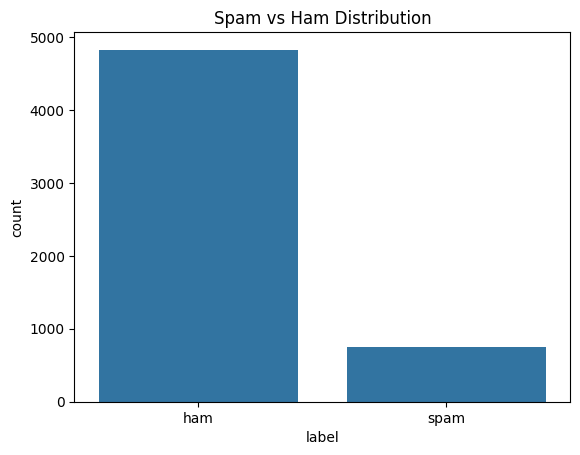

In [20]:
sns.countplot(x='label', data=df)
plt.title("Spam vs Ham Distribution")
plt.show()

In [21]:
df.duplicated().sum()

np.int64(403)

In [22]:
df = df.drop_duplicates()
df.shape

(5169, 2)

In [23]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
df['label'].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

In [25]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\03142997616\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [27]:
def preprocess(text):
    # convert to lowercase
    text = text.lower()
    
    # remove numbers
    text = re.sub(r'\d+', '', text)
    
    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # split words
    words = text.split()
    
    # remove stopwords + apply stemming
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    
    return " ".join(words)

In [28]:
df['cleaned_message'] = df['message'].apply(preprocess)
df.head()

,label,message,cleaned_message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though


In [29]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [30]:
import re
import string

def preprocess(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return " ".join(words)

In [31]:
df['cleaned_message'] = df['message'].apply(preprocess)
df.head()

,label,message,cleaned_message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though


In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
vectorizer = CountVectorizer(max_features=3000)

In [34]:
X = vectorizer.fit_transform(df['cleaned_message'])
y = df['label']

In [35]:
X.shape

(5169, 3000)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [43]:
print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)

Training Shape: (4135, 3000)
Testing Shape: (1034, 3000)


In [42]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [44]:
y_pred = model.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [46]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.971953578336557


In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       889
           1       0.89      0.91      0.90       145

    accuracy                           0.97      1034
   macro avg       0.94      0.95      0.94      1034
weighted avg       0.97      0.97      0.97      1034



In [48]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[873  16]
 [ 13 132]]


## Conclusion

A Naive Bayes classification model was trained to classify emails as spam or not spam.

After preprocessing the data, extracting features using Count Vectorization, and splitting the dataset into training and testing sets, the model achieved an accuracy of 97.2%.

The results indicate that the model performs very well in distinguishing between spam and non-spam emails. However, since the dataset is imbalanced, evaluation metrics such as precision and recall are also important for understanding model performance.

Overall, the model successfully meets the objective of classifying emails as spam or not spam.

In [49]:
def predict_spam(message):
    # Preprocess the message
    cleaned = preprocess(message)
    
    # Convert to vector
    vector = vectorizer.transform([cleaned])
    
    # Predict
    prediction = model.predict(vector)[0]
    
    if prediction == 1:
        return "Spam"
    else:
        return "Not Spam"

In [50]:
predict_spam("Congratulations! You have won a free lottery ticket. Call now!")

'Spam'

In [51]:
predict_spam("Hi, are we still meeting tomorrow at 10am?")

'Not Spam'